# CIFAR-10
## Carlos Blom-Dahl Ramos y Daniel Lillo Plaza
### Enunciado

Considera las siguientes arquitecturas convolucionales:

1. VGG16

2. ResNet-50

3. Custom ResNet (notebook de ejemplo)

Se trata de adaptar las 2 primeras arquitecturas para que funcionen con el dataset CIFAR-10 (disponible en Keras) y comparar los resultados con la tercera. 
No hace falta que entrenes completamente los modelos. Puedes valorar el comportamiento en las primeras iteraciones (en función del tiempo disponible).

Para cada una de las arquitecturas, deberías considerar al menos 2 opciones diferentes en relación a la cantidad de pesos preentrenados (o estructura de 
la red) que se preserva.

Lo más importante es que puedas llegar a algún tipo de conclusión sobre las expectativas de cada una de las opciones que te dé tiempo a valorar.

----------------

Las librerías y funciones necesarias para la ejecución del código son las siguientes:

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
import matplotlib.pyplot as plt
import seaborn as sns

Lo primero que haremos será importar el conjunto de datos y normalizar los mismos dividiéndolos por 255, para que así ahora estén en el rango $[0,1]$. Al normalizar los datos de entrada, se puede evitar que los valores de píxeles extremadamente altos o bajos dominen el proceso de aprendizaje y hace que el modelo sea más robusto y generalizable. Además, Las etiquetas 
están codificadas como enteros entre 0 y 9, por lo que las convertiremos en matrices _One-Hot_.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# VGG16

Comenzaremos empleando el modelo VGG16. Ya lo hemos visto en clase, pero por repasar: VGG16 es una red convolucional profunda con capas convolucionales de 3x3 y max pooling  de 2x2, seguidas de capas completamente conectadas. La versión original fue entrenada en el conjunto de datos ImageNet, que contiene imágenes de mayor  resolución (224x224 píxeles) y más clases (1000) que CIFAR-10. Por lo tanto, adaptaremos la estructura de la red para que sea más adecuada para nuestro  conjunto de datos.

Primero, vamos a cargar el modelo sin las últimas capas densas y con los pesos pre-entrenados en las capas convolucionales, las cuales vamos a congelar para acelerar el entrenamiento.

In [ ]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

for layer in vgg16.layers:
    layer.trainable = False

model_vgg16_2 = Sequential([
    vgg16,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model_vgg16_2.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 15,245,130
Trainable params: 530,442
Non-trainable params: 14,714,688
_______________________________________

A continuación, definiremos la función de pérdida (_loss function_), el optimizador (_optimizer_) y las métricas (_metrics_) que serán utilizadas para entrenar el modelo (compilar el modelo).

In [ ]:
model_vgg16_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Por último, entrenamos el modelo y lo evaluamos.

Epoch 1/15
1563/1563 [==============================] - 26s 11ms/step - loss: 1.3212 - accuracy: 0.5335 - val_loss: 1.2200 - val_accuracy: 0.5653
Epoch 2/15
1563/1563 [==============================] - 16s 11ms/step - loss: 1.1429 - accuracy: 0.5985 - val_loss: 1.1875 - val_accuracy: 0.5866
Epoch 3/15
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0623 - accuracy: 0.6249 - val_loss: 1.1440 - val_accuracy: 0.6024
Epoch 4/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9995 - accuracy: 0.6450 - val_loss: 1.1512 - val_accuracy: 0.6012
Epoch 5/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9399 - accuracy: 0.6669 - val_loss: 1.1375 - val_accuracy: 0.6092
Epoch 6/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8819 - accuracy: 0.6868 - val_loss: 1.1411 - val_accuracy: 0.6132
Epoch 7/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8204 - accuracy: 0.7089 - val_loss: 1.1446 -

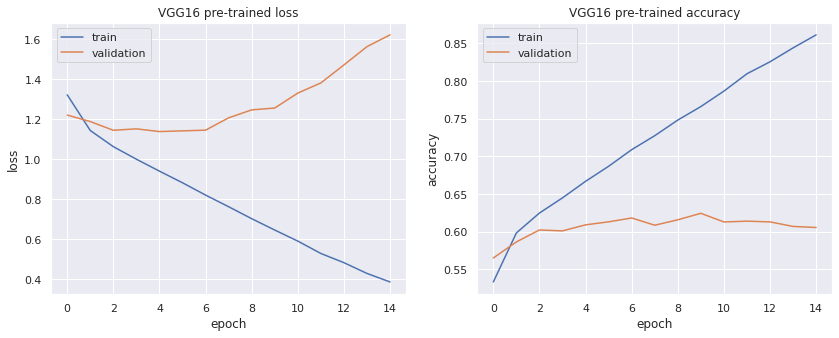

In [ ]:
history_vgg16_2 = model_vgg16_2.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels))

test_loss, test_acc = model_vgg16_2.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


sns.set_theme()
plt.figure(figsize=(14,5))
# "Loss"
plt.subplot(1,2,1)
plt.plot(history_vgg16_2.history['loss'])
plt.plot(history_vgg16_2.history['val_loss'])
plt.title('VGG16 pre-trained loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
# "Accuracy"
plt.subplot(1,2,2)
plt.plot(history_vgg16_2.history['accuracy'])
plt.plot(history_vgg16_2.history['val_accuracy'])
plt.title('VGG16 pre-trained accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Vemos cómo los resultados obtenidos son bastante malos, entorno a un 60% de _accuracy_ en el grupo test. Vamos a descongelar más capas, lo cual relentizará el proceso de entrenamiento pero ayudará a un mejor ajuste.

Epoch 1/15
1563/1563 [==============================] - 23s 13ms/step - loss: 1.2534 - accuracy: 0.5609 - val_loss: 1.1860 - val_accuracy: 0.5834
Epoch 2/15
1563/1563 [==============================] - 19s 12ms/step - loss: 1.0550 - accuracy: 0.6321 - val_loss: 1.0790 - val_accuracy: 0.6303
Epoch 3/15
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9792 - accuracy: 0.6595 - val_loss: 1.0011 - val_accuracy: 0.6532
Epoch 4/15
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9302 - accuracy: 0.6722 - val_loss: 0.9942 - val_accuracy: 0.6560
Epoch 5/15
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8879 - accuracy: 0.6888 - val_loss: 0.9964 - val_accuracy: 0.6591
Epoch 6/15
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8504 - accuracy: 0.7002 - val_loss: 0.9910 - val_accuracy: 0.6581
Epoch 7/15
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8218 - accuracy: 0.7097 - val_loss: 0.9756 -

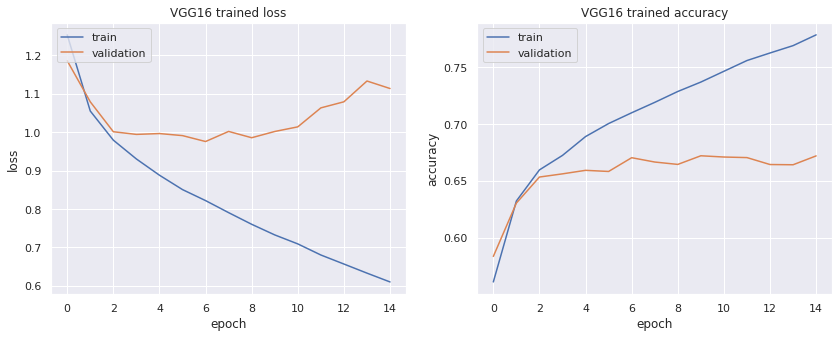

In [ ]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

for layer in vgg16.layers[:-2]:
    layer.trainable = False

model_vgg16_1 = Sequential([
    vgg16,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])
model_vgg16_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_vgg16_1 = model_vgg16_1.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels))

test_loss, test_acc = model_vgg16_1.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

sns.set_theme()
plt.figure(figsize=(14,5))
# "Loss"
plt.subplot(1,2,1)
plt.plot(history_vgg16_1.history['loss'])
plt.plot(history_vgg16_1.history['val_loss'])
plt.title('VGG16 trained loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
# "Accuracy"
plt.subplot(1,2,2)
plt.plot(history_vgg16_1.history['accuracy'])
plt.plot(history_vgg16_1.history['val_accuracy'])
plt.title('VGG16 trained accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Como podemos observar, en este caso no hay tanto desajuste entre el grupo _train_ y el grupo _test_, el proceso ha sido más lento pero, como cabía esperar, hemos obtenido unos resultados mejores. No parece que vaya a aumentar el _accuracy_ mucho más por encima del 66% ya que desde la _epoch_ 5 está ahí estancada.

# ResNet50

Alternativamente al VGG16, vamos a seguir los mismos pasos pero con ResNet50. Lo haremos exactamente como antes: primero dejaremos congeladas las capas convolucionales y añadiremos nostros otras tres capas nuevas al final para adaptar la salida a nuestros datos y acelerar el proceso de entrenamiento y, posteriormente, haremos otro modelo en el cual también entrenaremos las últimas dos capas convolucionales.

94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/100
1563/1563 [==============================] - 30s 16ms/step - loss: 2.0136 - accuracy: 0.2558 - val_loss: 1.8770 - val_accuracy: 0.3142
Epoch 2/100
1563/1563 [==============================] - 26s 17ms/step - loss: 1.8683 - accuracy: 0.3161 - val_loss: 1.7995 - val_accuracy: 0.3448
Epoch 3/100
1563/1563 [==============================] - 24s 15ms/step - loss: 1.8075 - accuracy: 0.3428 - val_loss: 1.8077 - val_accuracy: 0.3449
Epoch 4/100
1563/1563 [==============================] - 26s 16ms/step - loss: 1.7716 - accuracy: 0.3558 - val_loss: 1.7918 - val_accuracy: 0.3534
Epoch 5/100
1563/1563 [==============================] - 26s 17ms/step - loss: 1.7557 - accuracy: 0.3609 - val_loss: 1.8173 - val_accuracy: 0.3445
Epoch 6/100
1563/1563 [==============================] - 26s 17ms/step - loss: 1.7348 - accuracy: 0.3707 - val_loss: 1.7994 - val_accuracy: 0.3503
Epoch 7/100
1563/1563 [==============================

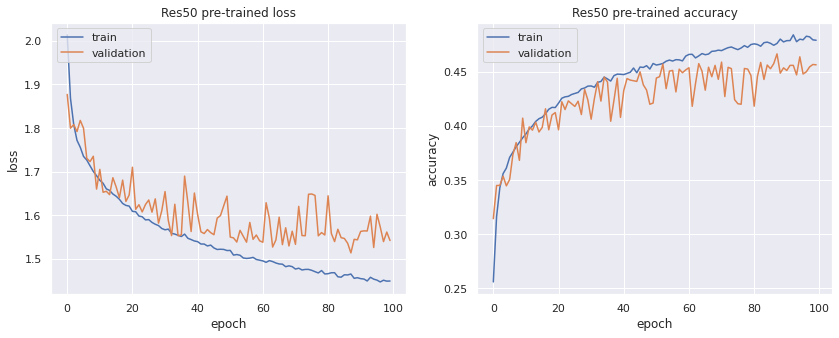

In [ ]:
res50 = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

for layer in res50.layers:
    layer.trainable = False

model_res50_2 = Sequential([
    res50,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model_res50_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_res50_2 = model_res50_2.fit(train_images, train_labels, epochs=100, validation_data=(test_images, test_labels))

test_loss, test_acc = model_res50_2.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

sns.set_theme()
plt.figure(figsize=(14,5))
# "Loss"
plt.subplot(1,2,1)
plt.plot(history_res50_2.history['loss'])
plt.plot(history_res50_2.history['val_loss'])
plt.title('Res50 pre-trained loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
# "Accuracy"
plt.subplot(1,2,2)
plt.plot(history_res50_2.history['accuracy'])
plt.plot(history_res50_2.history['val_accuracy'])
plt.title('Res50 pre-trained accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Obtenemos unos resultados mucho peores que antes. No hay ningún sobreajuste, pero el modelo acierta entorno al 45% de las veces.

Epoch 1/100
1563/1563 [==============================] - 31s 17ms/step - loss: 2.0306 - accuracy: 0.2472 - val_loss: 1.8683 - val_accuracy: 0.3257
Epoch 2/100
1563/1563 [==============================] - 26s 17ms/step - loss: 1.8687 - accuracy: 0.3120 - val_loss: 1.9046 - val_accuracy: 0.3146
Epoch 3/100
1563/1563 [==============================] - 24s 16ms/step - loss: 1.8101 - accuracy: 0.3394 - val_loss: 1.7750 - val_accuracy: 0.3497
Epoch 4/100
1563/1563 [==============================] - 26s 17ms/step - loss: 1.7794 - accuracy: 0.3496 - val_loss: 1.7069 - val_accuracy: 0.3857
Epoch 5/100
1563/1563 [==============================] - 24s 16ms/step - loss: 1.7575 - accuracy: 0.3618 - val_loss: 1.7091 - val_accuracy: 0.3839
Epoch 6/100
1563/1563 [==============================] - 26s 16ms/step - loss: 1.7334 - accuracy: 0.3682 - val_loss: 1.7075 - val_accuracy: 0.3841
Epoch 7/100
1563/1563 [==============================] - 26s 17ms/step - loss: 1.7173 - accuracy: 0.3797 - val_loss: 1

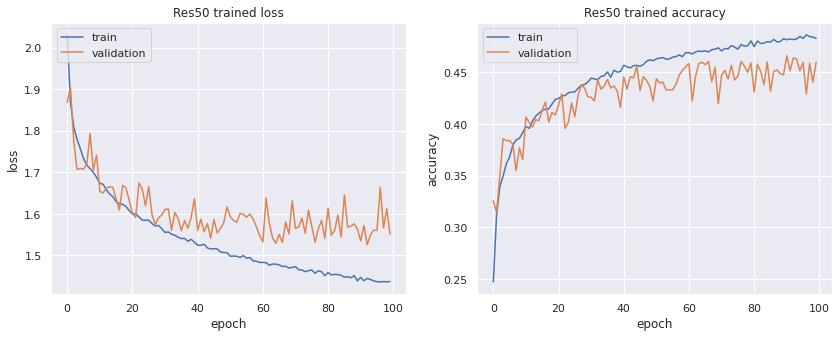

In [ ]:
res50 = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

for layer in res50.layers[:-2]:
    layer.trainable = False

model_res50_1 = Sequential([
    res50,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model_res50_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_res50_1 = model_res50_1.fit(train_images, train_labels, epochs=100, validation_data=(test_images, test_labels))

test_loss, test_acc = model_res50_1.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

sns.set_theme()
plt.figure(figsize=(14,5))
# "Loss"
plt.subplot(1,2,1)
plt.plot(history_res50_1.history['loss'])
plt.plot(history_res50_1.history['val_loss'])
plt.title('Res50 trained loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
# "Accuracy"
plt.subplot(1,2,2)
plt.plot(history_res50_1.history['accuracy'])
plt.plot(history_res50_1.history['val_accuracy'])
plt.title('Res50 trained accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


En este caso los resultados no mejoran. Es cierto que la convvergencia a 45% se da más rápido que en el proceso anterior (más rápido en cuanto a número de _epochs_ porque, como es natural, tarda más en entrenar al haber descongelado más capas) pero no pasa de ahí.

# Conclusión

Comparando los resultados con el modelo _Custom ResNet_ desarrollado en clase, vemos que no hemos podido alcanzar unos resultados similares. Esto principalmente es debido a que el modelo _Custom ResNet_ fue entrenado desde 0 para los datos CIFAR-10, mientras que los dos modelos planteados en este *notebook* solo han sido entrenados parcialmente para este conjunto de datos para acelerar el proceso. Aún así, claramente los resultados que obtenemos con VGG16 son mejores que los obtenidos con ResNet50, tanto en _accuracy_ como en tiempo de ejecución.

Por último, vamos a entrenar ambas redes desde 0.

In [ ]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

Epoch 1/50
1563/1563 [==============================] - 51s 30ms/step - loss: 1.8461 - accuracy: 0.2522 - val_loss: 1.5550 - val_accuracy: 0.3604
Epoch 2/50
1563/1563 [==============================] - 46s 29ms/step - loss: 1.4559 - accuracy: 0.4235 - val_loss: 1.3291 - val_accuracy: 0.4674
Epoch 3/50
1563/1563 [==============================] - 45s 29ms/step - loss: 1.2563 - accuracy: 0.5283 - val_loss: 1.1321 - val_accuracy: 0.5880
Epoch 4/50
1563/1563 [==============================] - 45s 29ms/step - loss: 1.0612 - accuracy: 0.6129 - val_loss: 1.0345 - val_accuracy: 0.6322
Epoch 5/50
1563/1563 [==============================] - 46s 29ms/step - loss: 0.9504 - accuracy: 0.6620 - val_loss: 0.9906 - val_accuracy: 0.6523
Epoch 6/50
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8447 - accuracy: 0.7024 - val_loss: 0.8874 - val_accuracy: 0.6966
Epoch 7/50
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8155 - accuracy: 0.7128 - val_loss: 0.8326 -

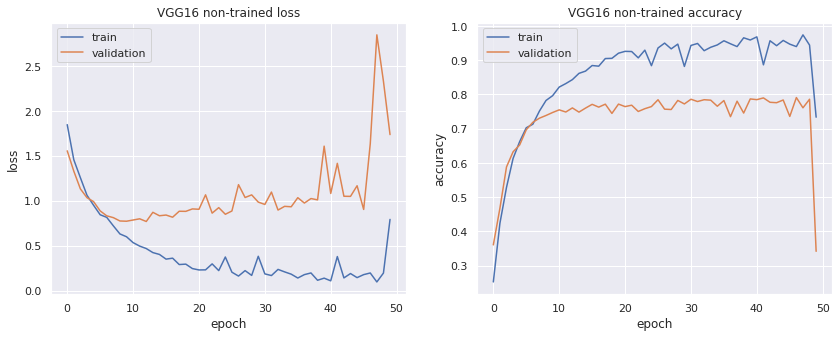

In [ ]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

model_vgg16_3 = Sequential([
    vgg16,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])
model_vgg16_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_vgg16_3 = model_vgg16_3.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels))

test_loss, test_acc = model_vgg16_3.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

sns.set_theme()
plt.figure(figsize=(14,5))
# "Loss"
plt.subplot(1,2,1)
plt.plot(history_vgg16_3.history['loss'])
plt.plot(history_vgg16_3.history['val_loss'])
plt.title('VGG16 non-trained loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
# "Accuracy"
plt.subplot(1,2,2)
plt.plot(history_vgg16_3.history['accuracy'])
plt.plot(history_vgg16_3.history['val_accuracy'])
plt.title('VGG16 non-trained accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/100
1563/1563 [==============================] - 108s 48ms/step - loss: 1.4794 - accuracy: 0.4898 - val_loss: 1.3975 - val_accuracy: 0.5259
Epoch 2/100
1563/1563 [==============================] - 74s 47ms/step - loss: 1.2778 - accuracy: 0.5602 - val_loss: 1.5632 - val_accuracy: 0.4456
Epoch 3/100
1563/1563 [==============================] - 75s 48ms/step - loss: 1.1401 - accuracy: 0.6063 - val_loss: 1.8790 - val_accuracy: 0.4000
Epoch 4/100
1563/1563 [==============================] - 76s 49ms/step - loss: 1.1530 - accuracy: 0.6062 - val_loss: 1.7900 - val_accuracy: 0.4641
Epoch 5/100
1563/1563 [==============================] - 75s 48ms/step - loss: 1.0941 - accuracy: 0.6212 - val_loss: 1.2116 - val_accuracy: 0.5710
Epoch 6/100
1563/1563 [==============================] - 73s 47ms/step - loss: 1.0099 - accuracy: 0.6527 - val_loss: 1.7649 - val_accuracy: 0.4053
Epoch 7/100
1563/1563 [=============================

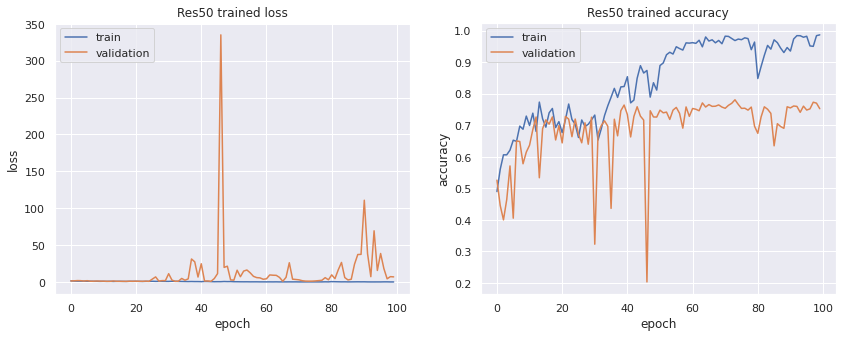

In [ ]:
res50 = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

model_res50_3 = Sequential([
    res50,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model_res50_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_res50_3 = model_res50_3.fit(train_images, train_labels, epochs=100, validation_data=(test_images, test_labels))

test_loss, test_acc = model_res50_3.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

sns.set_theme()
plt.figure(figsize=(14,5))
# "Loss"
plt.subplot(1,2,1)
plt.plot(history_res50_3.history['loss'])
plt.plot(history_res50_3.history['val_loss'])
plt.title('Res50 trained loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
# "Accuracy"
plt.subplot(1,2,2)
plt.plot(history_res50_3.history['accuracy'])
plt.plot(history_res50_3.history['val_accuracy'])
plt.title('Res50 trained accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Como cabía esperar, el tiempo de entrenamiento aumenta considerablemente. Sin embargo, también lo hace la precisión de nuestro modelo, situándose en ambdos casos un poco por debajo del $80\%$. Vemos cómo el VGG16 alcanza entre 10 y 20 _epochs_ esa precisión, mientras que la ResNet50 tarda unas 40 _epochs_.